In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import glob
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
import pickle
with open('/content/drive/MyDrive/brain_tumor_lists.pkl', 'rb') as f:
    data = pickle.load(f)

notumor_imgs = data['notumor']
pituitary_imgs = data['pituitary']
meningioma_imgs = data['meningioma']
glioma_imgs = data['glioma']

In [22]:
len(notumor_imgs)

1595

In [23]:
notumor_imgs[0].shape

(208, 233, 3)

In [24]:
notumor_imgs_resized = []
for img in notumor_imgs:
    img_resized = cv.resize(img, (224, 224))
    notumor_imgs_resized.append(img_resized)
del notumor_imgs

pituitary_imgs_resized = []
for img in pituitary_imgs:
    img_resized = cv.resize(img, (224, 224))
    pituitary_imgs_resized.append(img_resized)
del pituitary_imgs

meningioma_imgs_resized = []
for img in meningioma_imgs:
    img_resized = cv.resize(img, (224, 224))
    meningioma_imgs_resized.append(img_resized)
del meningioma_imgs

glioma_imgs_resized = []
for img in glioma_imgs:
    img_resized = cv.resize(img, (224, 224))
    glioma_imgs_resized.append(img_resized)
del glioma_imgs

In [25]:
notumor_imgs_resized[500].shape

(224, 224, 3)

In [26]:
print(len(notumor_imgs_resized))
print(len(pituitary_imgs_resized))
print(len(meningioma_imgs_resized))
print(len(glioma_imgs_resized))

1595
1457
1339
1321


In [27]:
def hv_stripes_fixed(img, n_stripes, thickness):

    H, W = img.shape[:2]
    out = img.copy()

    fill_value = img.mean()

    if n_stripes * thickness >= H:
        raise ValueError("n_stripes * thickness باید کمتر از 224 باشد")

    gap = (H - n_stripes * thickness) // (n_stripes + 1)

    for i in range(n_stripes):
        start = gap * (i + 1) + thickness * i
        end = start + thickness
        if img.ndim == 2:
            out[start:end, :] = fill_value
        else:
            out[start:end, :, :] = fill_value

    for i in range(n_stripes):
        start = gap * (i + 1) + thickness * i
        end = start + thickness
        if img.ndim == 2:
            out[:, start:end] = fill_value
        else:
            out[:, start:end, :] = fill_value

    return out

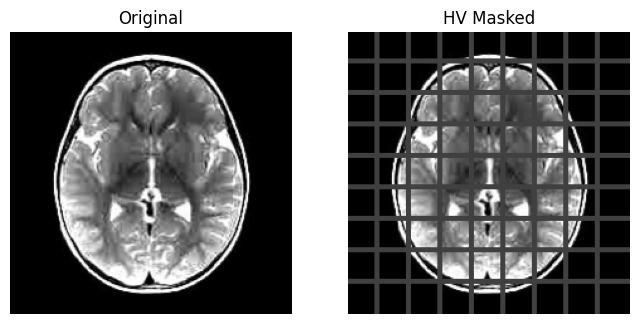

In [28]:

img = notumor_imgs_resized[500]
aug = hv_stripes_fixed(img, n_stripes=8, thickness=4)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img.squeeze(), cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(aug.squeeze(), cmap="gray")
plt.title("HV Masked")
plt.axis("off")
plt.show()


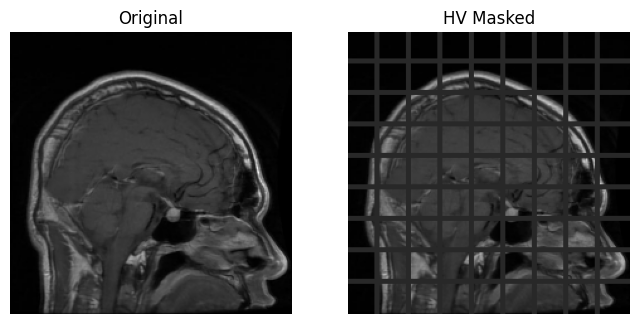

In [29]:
img = pituitary_imgs_resized[500]
aug = hv_stripes_fixed(img, n_stripes=8, thickness=4)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img.squeeze(), cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(aug.squeeze(), cmap="gray")
plt.title("HV Masked")
plt.axis("off")
plt.show()

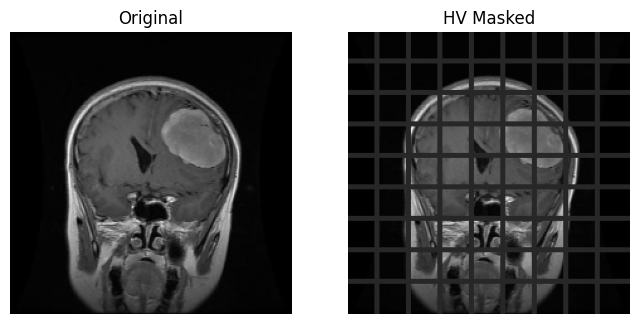

In [30]:
img = meningioma_imgs_resized[500]
aug = hv_stripes_fixed(img, n_stripes=8, thickness=4)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img.squeeze(), cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(aug.squeeze(), cmap="gray")
plt.title("HV Masked")
plt.axis("off")
plt.show()

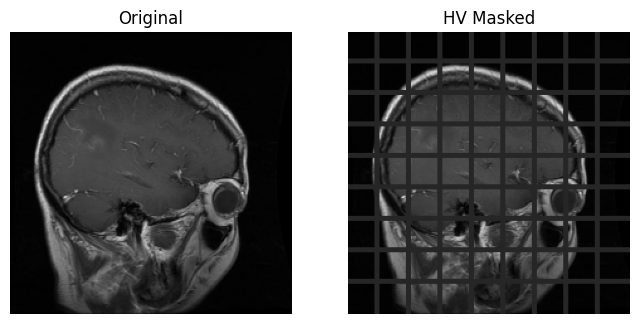

In [31]:
img = glioma_imgs_resized[500]
aug = hv_stripes_fixed(img, n_stripes=8, thickness=4)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img.squeeze(), cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(aug.squeeze(), cmap="gray")
plt.title("HV Masked")
plt.axis("off")
plt.show()

In [32]:
def double_list_with_hv_stripes(img_list, n_stripes, thickness):
    aug_list = []
    for img in img_list:
        aug_list.append(hv_stripes_fixed(img, n_stripes, thickness))
    return img_list + aug_list

In [33]:
n_stripes = 8
thickness = 4

notumor_imgs_resized_2x    = double_list_with_hv_stripes(notumor_imgs_resized, n_stripes, thickness)
pituitary_imgs_resized_2x  = double_list_with_hv_stripes(pituitary_imgs_resized, n_stripes, thickness)
meningioma_imgs_resized_2x = double_list_with_hv_stripes(meningioma_imgs_resized, n_stripes, thickness)
glioma_imgs_resized_2x     = double_list_with_hv_stripes(glioma_imgs_resized, n_stripes, thickness)

print(len(notumor_imgs_resized), "->", len(notumor_imgs_resized_2x))
print(len(pituitary_imgs_resized), "->", len(pituitary_imgs_resized_2x))
print(len(meningioma_imgs_resized), "->", len(meningioma_imgs_resized_2x))
print(len(glioma_imgs_resized), "->", len(glioma_imgs_resized_2x))

1595 -> 3190
1457 -> 2914
1339 -> 2678
1321 -> 2642


In [35]:
# 1) طول هر کلاس را نگه دار (برای جدا کردن بعدی با index range)
n_notumor    = len(notumor_imgs_resized)
n_pituitary  = len(pituitary_imgs_resized)
n_meningioma = len(meningioma_imgs_resized)
n_glioma     = len(glioma_imgs_resized)

# 2) ساخت total_imgs و labels
total_imgs = []
labels = []

total_imgs.extend(notumor_imgs_resized_2x)
labels.extend([0] * n_notumor)

total_imgs.extend(pituitary_imgs_resized_2x)
labels.extend([1] * n_pituitary)

total_imgs.extend(meningioma_imgs_resized_2x)
labels.extend([2] * n_meningioma)

total_imgs.extend(glioma_imgs_resized_2x)
labels.extend([3] * n_glioma)

labels = np.array(labels, dtype=np.int64)

print(len(total_imgs), labels.shape)

del notumor_imgs_resized
del notumor_imgs_resized_2x
del meningioma_imgs_resized
del meningioma_imgs_resized_2x
del pituitary_imgs_resized
del pituitary_imgs_resized_2x
del glioma_imgs_resized
del glioma_imgs_resized_2x

11424 (5712,)


In [37]:
total_imgs = np.array(total_imgs)

total_imgs.shape

(11424, 224, 224, 3)

In [38]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "image": list(total_imgs),
    "Labels": np.array(labels, dtype="int32")
})

print(df.head())
print(df["Labels"].value_counts())


ValueError: All arrays must be of the same length

In [36]:
from sklearn.preprocessing import LabelEncoder

y = df["Labels"].values
le = LabelEncoder()
y = le.fit_transform(y).astype("int32")   # 0..3

print("classes:", le.classes_)
print("min/max y:", y.min(), y.max())
print("images:", total_imgs.shape, total_imgs.dtype)
print("labels:", y.shape, y.dtype)

NameError: name 'df' is not defined